Md. Irfan Hossain, Senior Program Officer, Data Analyst, GIRL Center, Population Council

##### Objectives:
###### Performing Classification Trees
 - Importing the dataset
 - Explaining the features and target variable
 - Dealing with the missing values
 - Performing One-hot Encoding
 - Spliting the original dataset into the train set (80%) and the test set (20%) with addition of random state and stratification
 - Performing the training with Decision Tree Classifier
 - Producing a tree diagram of the Decision Tree
 - Finding the Confusion Matrix, Classification report, and ROC-AUC

#### Import required libraries and packages

In [1]:
# to build a classification tree
from sklearn.tree import DecisionTreeClassifier
# to draw a classification tree
from sklearn.tree import plot_tree
# to split data into training and testing sets
from sklearn.model_selection import train_test_split
# to cross-validate
from sklearn.model_selection import cross_val_score
# to build a confusion matrix, classification report, ROC and AUC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
# to plot a confusion matrix
from sklearn.metrics import plot_confusion_matrix

# to load & analyze data and perform One-Hot Encoding
import pandas as pd
# to load maximum 100 row and columns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# to analyze data
import numpy as np
# to plot
import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

#### Read data file as dataframe

In [2]:
df = pd.read_csv("processed.cleveland.data", header=None)

display(df.head(10))
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


(303, 14)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


***Comment***: As the column names are missing, we have to manually set them up. Looking at the available documents from the datasource, I came up with following plausible column names (with explanation and possible value codings)

#### Features

0. **age**: age in years
1. **sex**: sex (1 = male; 0 = female)
2. **cp**: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
3. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
4. **chol**: serum cholestoral in mg/dl
5. **fbs**: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
6. **restecg**: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
7. **thalach**: maximum heart rate achieved
8. **exang**: exercise induced angina (1 = yes; 0 = no)
9. **oldpeak**: ST depression induced by exercise relative to rest
10. **slope**: the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
11. **ca**: number of major vessels (0-3) colored by flourosopy
12. **thal**: Thalium heart scan (3 = normal; 6 = fixed defect; 7 = reversable defect)

#### Target variable

13. **hd**: diagnosis of heart disease (angiographic disease status), the predicted attribute

In [4]:
# setting up the column names
df.columns = ['age',
              'sex',
              'cp',
              'trestbps',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
# to check
display(df.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


#### Missing value detection
First we have to detect whether the dataset has any missing values or not. One way is to quickly is info of the data then we have to dig down variable wise.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  hd        303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


**Comment**:With the proper column name this quick view informs us that no missing valus as entry related occured in the dataset. Lets check each variable individually then - (since we are dealing with 14 variables only)

In [6]:
df['age'].unique()

array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
       71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
       74., 76.])

**Comment**: <u>No missing values for **age** and also values are realistic.

In [7]:
df['sex'].unique()

array([1., 0.])

**Comment**: <u>No missing values for **sex** and also values are consistent with dataset documentation

In [8]:
df['cp'].unique()

array([1., 4., 3., 2.])

**Comment**: <u>No missing values for **cp** and also values are consistent with dataset documentation. Also we should note that this feature is potentional for One-Hot Encoding later on since this is categorical.

In [9]:
df['trestbps'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.])

**Comment**: <u>No missing values for **trestbps** and also values are realistic

In [10]:
df['chol'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

**Comment**: <u>No missing values for **chol** and also values are realistic

In [11]:
df['fbs'].unique()

array([1., 0.])

**Comment**: <u>No missing values for **fbs** and also values are consistent with dataset documentation

In [12]:
df['restecg'].unique()

array([2., 0., 1.])

**Comment**: <u>No missing values for **restecg** and also values are consistent with dataset documentation. Also we should note that this feature is potentional for One-Hot Encoding later on since this is categorical.

In [13]:
df['thalach'].unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 115., 149., 145., 146., 175.,
       186., 185., 159., 130., 190., 136.,  97., 127., 154., 133., 126.,
       202., 103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105.,
       194., 195., 106., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.])

**Comment**: <u>No missing values for **thalach** and also values are realistic

In [14]:
df['exang'].unique()

array([0., 1.])

**Comment**: <u>No missing values for **exang** and also values are consistent with dataset documentation

In [15]:
df['oldpeak'].unique()

array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0. , 0.5,
       1.6, 1. , 1.2, 0.2, 1.8, 3.2, 2.4, 2. , 2.5, 2.2, 2.8, 3. , 3.4,
       6.2, 4. , 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4])

**Comment**: <u>No missing values for **oldpeak** and also values are consistent with dataset documentation

In [16]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

**Comment**: **Missing values** detected for **ca** and "?" contradicts with allowable values mentioned in the dataset documentation

In [17]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

**Comment**: **Missing values** detected for **thal** and "?" contradicts with allowable values mentioned in the dataset documentation. Also we should note that this feature is potentional for One-Hot Encoding later on since this is categorical.

In [18]:
df['hd'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

**Comment**: <u>No missing values for **hd** and also values are consistent with dataset documentation.
    However, we will need to make it a binary (0 or else) as the goal is to fit simple decision tree.

#### Magnitude of missing values to decide the remedy
As we have detected the dataset has missing values. We have to decide how much of the data is missing. If it is a major proportion we have to use imputation. If it is negligible we can discard those obeservations (rows) can carry out our classification procedures.

In [19]:
# print the number of rows affected by missing values of "ca"
len(df.loc[(df['ca'] == '?')])

4

In [20]:
# print the number of rows affected by missing values of "thal"
len(df.loc[(df['thal'] == '?')])

2

**Comment**: Since only 6 observations (rows) are affected by missing values out of 303 observations that we saw from earlier used **df.info()**, we can discard them and proceed with our intended activities.

In [21]:
# to remove rows with missing values
df = df.loc[(df['ca'] != '?')
           &
           (df['thal'] != '?')]
# to check how dataset becomes now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  hd        297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


#### One-Hot encoding

In [22]:
df = pd.get_dummies(df, columns = ['cp',
                                  'restecg',
                                  'slope',
                                  'thal'])

display(df.head(3))
print(df.info())

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,hd,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,0,0,0,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          297 non-null    float64
 1   sex          297 non-null    float64
 2   trestbps     297 non-null    float64
 3   chol         297 non-null    float64
 4   fbs          297 non-null    float64
 5   thalach      297 non-null    float64
 6   exang        297 non-null    float64
 7   oldpeak      297 non-null    float64
 8   ca           297 non-null    object 
 9   hd           297 non-null    int64  
 10  cp_1.0       297 non-null    uint8  
 11  cp_2.0       297 non-null    uint8  
 12  cp_3.0       297 non-null    uint8  
 13  cp_4.0       297 non-null    uint8  
 14  restecg_0.0  297 non-null    uint8  
 15  restecg_1.0  297 non-null    uint8  
 16  restecg_2.0  297 non-null    uint8  
 17  slope_1.0    297 non-null    uint8  
 18  slope_2.0    297 non-null    uint8  
 19  slope_3.

**Comment**: One-Hot Encoding created 4 features from **cp**, 3 features from **restecg**, 3 features from **slope** and 3 features from **thal**.

#### Separating features and the target variable

In [23]:
target = ['hd']

X = df.drop('hd', axis=1)
y = df[target]

print(X.shape, y.shape)
display(y.head(10))

(297, 22) (297, 1)


,hd
0,0
1,2
2,1
3,0
4,0
5,0
6,3
7,0
8,2
9,1


In [24]:
more_than_0_index = y > 0
y[more_than_0_index] = 1
y['hd'].unique()
display(y.head(10))

,hd
0,0
1,1
2,1
3,0
4,0
5,0
6,1
7,0
8,1
9,1


#### Spliting the original dataset into the train set (80%) and the test set (20%)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 22) (60, 22) (237, 1) (60, 1)


#### Checking whether stratification worked or not

In [26]:
class_0_train = y_train['hd'].value_counts().values[0]
class_1_train = y_train['hd'].value_counts().values[1]

train_ratio = class_1_train/class_0_train

print (train_ratio)

0.8515625


In [27]:
class_0_test = y_test['hd'].value_counts().values[0]
class_1_test = y_test['hd'].value_counts().values[1]

test_ratio = class_1_test/class_0_test

print (test_ratio)

0.875


**Comment**: From the proportions of 1 in train and testing datasets - both are fairly close

#### Performing training: Decision Tree Classifier

In [28]:
model = DecisionTreeClassifier(random_state=123)
model = model.fit(X_train, y_train)

#### Prediction

In [29]:
y_pred = model.predict(X_test)

#### Prediction Comparison with the test data

In [30]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_hd'] = y_pred

display(y_test.sample(10))

,hd,probability,predicted_hd
134,0,0.0,0
230,0,0.0,0
293,1,1.0,1
74,1,1.0,1
99,0,0.0,0
126,1,1.0,1
226,0,0.0,0
300,1,1.0,1
206,1,1.0,1
89,0,0.0,0


#### Producing a tree diagram of the Decision Tree

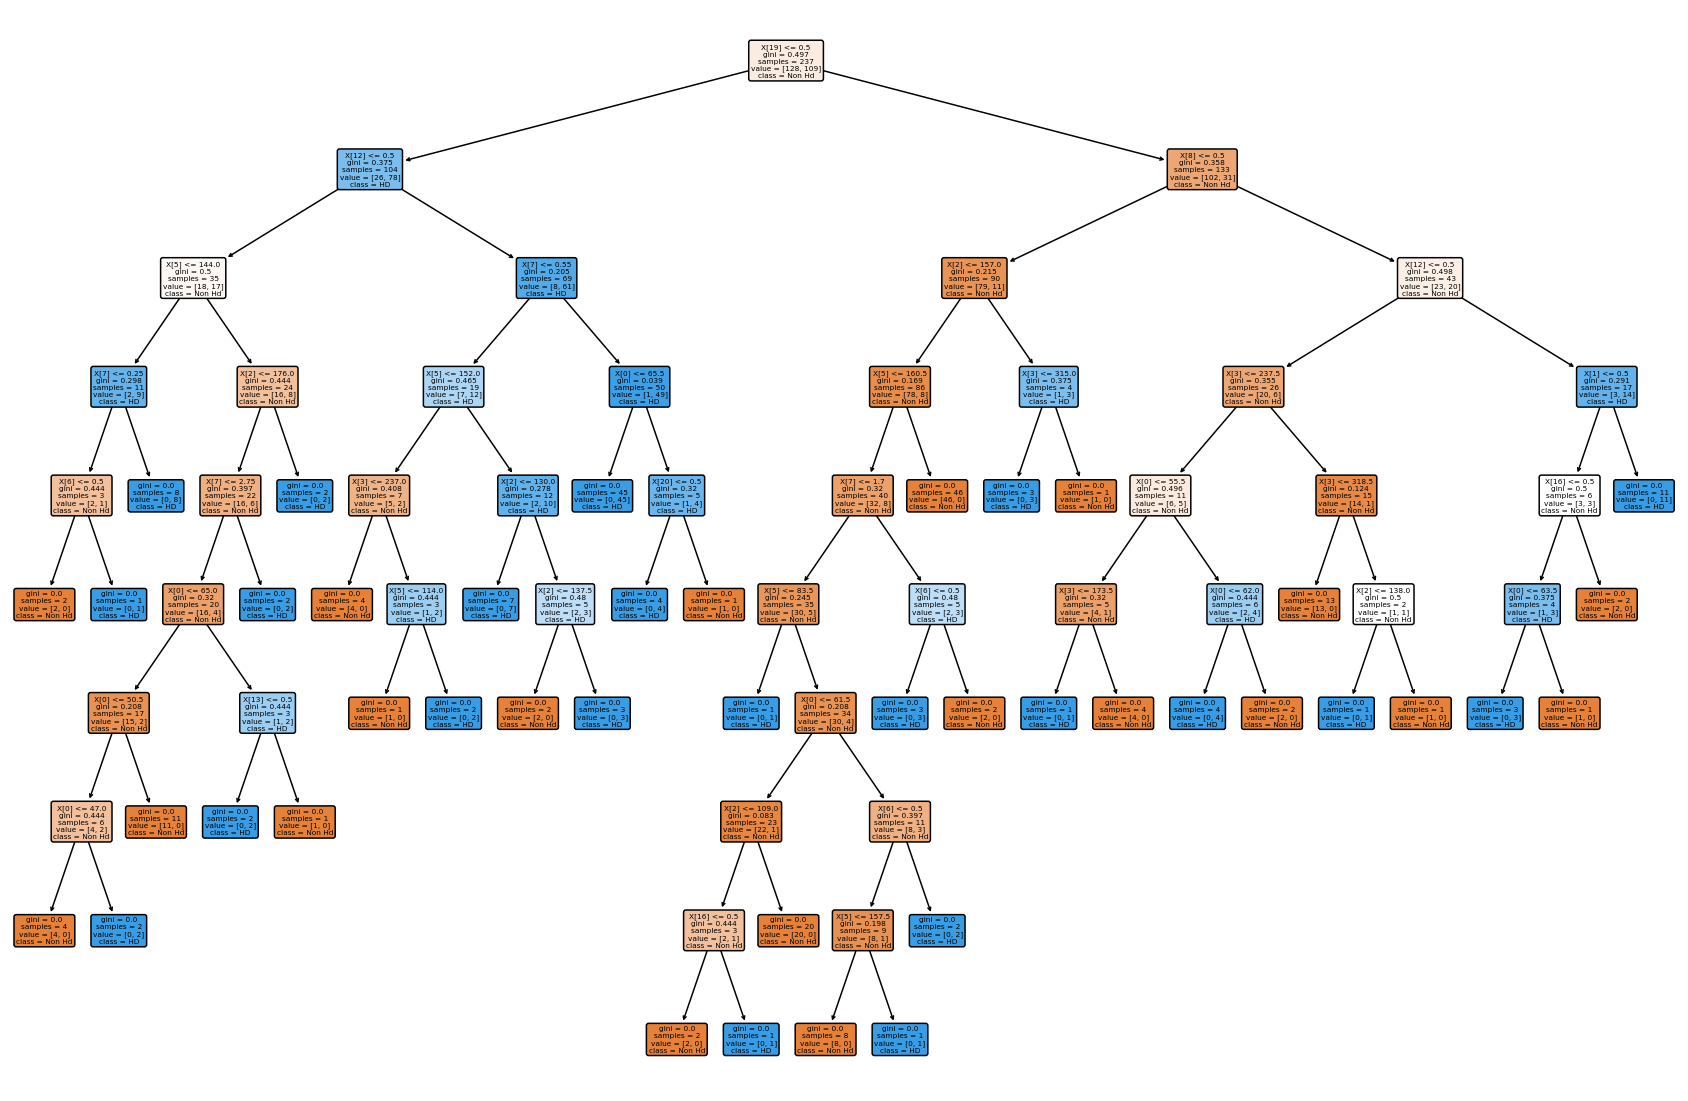

In [31]:
plt.figure(figsize=(30,20))
plot_tree(model,
         filled=True,
         rounded=True,
         class_names=["Non Hd", "HD"]);

#### Confusion Matrix

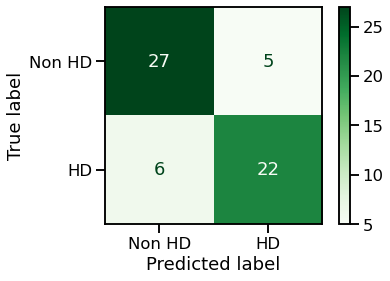

In [32]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['hd'], 
                      display_labels=["Non HD", "HD"],
                      cmap='Greens')
plt.show()

#### Classification report

In [33]:
class_report = classification_report(y_test['hd'], 
                                     y_test['predicted_hd'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



**Comment**: Looking at the above confusion matrix results we observe 
<br>Precision - the fitted classificiation model classified 81% heart disease cases. 
<br>Recall - Among those who had actual heart diseases this classification identified 79% of them. 
<br>Accuracy - overall accuracy is 82% which we may use for comparison with anyother type of models with this classification

#### ROC-AUC

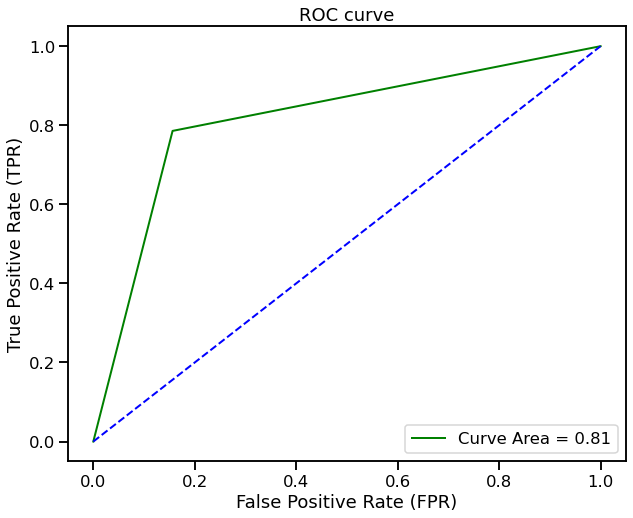

In [34]:
fpr, tpr, thr = roc_curve(y_test['hd'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['hd'], 
                             y_test['predicted_hd']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2.0,0.00000,0.000000
1,1.0,0.15625,0.785714
2,0.0,1.00000,1.000000


**Comment**: The result of ROC and AUC can be used in next phase for model selection.